In [1]:
import numpy as np
import h5py
from skimage import io
from matplotlib import pyplot as plt
import torch
from torch.autograd import Variable
import torch.optim as optim

In [251]:
fil=h5py.File('shapemodel.h5','r')
fly=open('testface_landmarks.txt')
ftxt=fly.readlines()
for i in range(len(ftxt)):
    ftxt[i]=ftxt[i].strip('\n').split(' ')
for i in range(68):
    for j in range(2):
        ftxt[i][j]=float(ftxt[i][j])

In [221]:
d.shape

(68,)

现在还是不可行，改进：1:先将对应下标的数据提出来再用Variable包裹;2：f参数的设置换一种方式;

In [252]:
U_label=Variable(torch.FloatTensor(np.array(ftxt).T))
d=fil['keypoints'][:][0]
s_mean_raw=torch.FloatTensor(fil['mean_shape'][:])  #159645*1;
s_raw=torch.FloatTensor(fil['pca_basis'][:])   #159645*50;
s_mean=torch.rand(204,1)
s=torch.rand((204,50))
for i in range(204):
    if i%3==0:
        s_mean[i]=s_mean_raw[d[i%3]*3]
        s_mean[i+1]=s_mean_raw[d[i%3]*3+1]
        s_mean[i+2]=s_mean_raw[d[i%3]*3+2]
for i in range(50):
    for j in range(204):
        if j%3==0:
            s[j,i]=s_raw[d[j%3]*3,i]
            s[j+1,i]=s_raw[d[j%3]*3+1,i]
            s[j+2,i]=s_raw[d[j%3]*3+2,i]
s=Variable(s)
s_mean=Variable(s_mean)
P=Variable(torch.FloatTensor([[1,0,0],[0,1,0]]))
sigma=Variable(torch.FloatTensor(fil['sigma'][:]))   #50*1;

In [253]:
#f=Variable(torch.rand(1),requires_grad=True)
alpha=Variable(torch.rand((50,1)),requires_grad=True)
S=s_mean+s.mm(alpha)
S=torch.t(S.view(68,3))
R=Variable(torch.rand((3,3)),requires_grad=True)
t=Variable(torch.rand((2)),requires_grad=True)
U_proj=P.mm(R).mm(S)
for i in range(68):
    U_proj[:,i]=U_proj[:,i]+t

In [282]:
optimizer = optim.SGD([R,t,alpha], lr = 0.000000005)

In [26]:
#for i in range(2):
    for j in range(68):
        U_proj[i,j]=U_proj[i,j]/torch.sum(U_proj.data[i,:])
        U_label[i,j]=U_label[i,j]/torch.sum(U_label.data[i,:])

In [255]:
loss=((alpha*alpha)/(sigma*sigma)).mean()+((U_proj-U_label)*(U_proj-U_label)).mean()
loss.backward()
optimizer.step()

In [281]:
t.grad

Variable containing:
1.00000e-03 *
  2.3500
 -1.1821
[torch.FloatTensor of size 2]

In [89]:
optimizer.zero_grad()

In [257]:
loss_print=[]
loss_100=0

(
 0.7518
 0.4442
[torch.FloatTensor of size 2]
, 
 0.4054  0.9878  0.6558
 0.2069  0.6307  0.2050
 0.3096  0.8861  0.6747
[torch.FloatTensor of size 3x3]
, 
1.00000e-02 *
  4.0843
[torch.FloatTensor of size 1]
, 54.576416015625)
(
-1607.8438
  799.5618
[torch.FloatTensor of size 2]
, 
 3.0869e+07 -1.8831e+07  1.7169e+07
-1.5335e+07  9.3547e+06 -8.5294e+06
 3.0957e-01  8.8608e-01  6.7469e-01
[torch.FloatTensor of size 3x3]
, 
-9.7046e+07
[torch.FloatTensor of size 1]
, 8.133118312709259e+20)
(
nan
nan
[torch.FloatTensor of size 2]
, 
nan nan nan
nan nan nan
nan nan nan
[torch.FloatTensor of size 3x3]
, 
nan
[torch.FloatTensor of size 1]
, nan)
(
nan
nan
[torch.FloatTensor of size 2]
, 
nan nan nan
nan nan nan
nan nan nan
[torch.FloatTensor of size 3x3]
, 
nan
[torch.FloatTensor of size 1]
, nan)
(
nan
nan
[torch.FloatTensor of size 2]
, 
nan nan nan
nan nan nan
nan nan nan
[torch.FloatTensor of size 3x3]
, 
nan
[torch.FloatTensor of size 1]
, nan)
(
nan
nan
[torch.FloatTensor of size 2

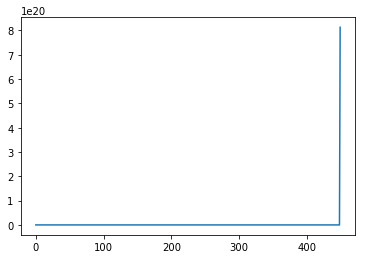

In [283]:
for i in range(500):
    optimizer.zero_grad()
    alpha=alpha
    S=s_mean+s.mm(alpha)
    S=torch.t(S.view(68,3))
    R=R
    t=t
    U_proj=P.mm(R).mm(S)
    for ii in range(68):
        U_proj[:,ii]=U_proj[:,ii]+t
    loss=((alpha*alpha)/(sigma*sigma)).mean()+((U_proj-U_label)*(U_proj-U_label)).mean()
    loss_100=loss_100+loss.data[0]
    #print;
    loss.backward()
    optimizer.step()
    if i%10==0:
        #print loss_100
        loss_print.append(loss_100/100.0)
        print(t.data,R.data,alpha.data[0],loss_100/100.0)
        loss_100=0

plt.plot(loss_print[2:])
plt.show()

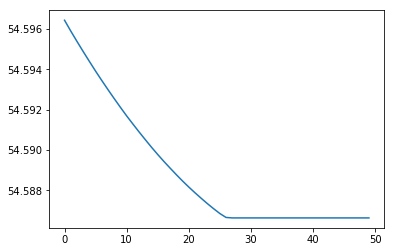

In [272]:
plt.plot(loss_print[350:])
plt.show()

In [273]:
t

Variable containing:
 0.7518
 0.4442
[torch.FloatTensor of size 2]

In [141]:
t

Variable containing:
 0.1508
 0.4501
[torch.FloatTensor of size 2]

In [274]:
R

Variable containing:
 0.4053  0.9878  0.6558
 0.2069  0.6307  0.2050
 0.3096  0.8861  0.6747
[torch.FloatTensor of size 3x3]

In [142]:
R

Variable containing:
 0.2827  0.7350  0.4115
 0.4704  0.9626  0.9505
 0.6096  0.5937  0.4380
[torch.FloatTensor of size 3x3]

In [275]:
alpha.data.numpy()[:,0]

array([ 0.04084294,  0.15687115,  0.21097147,  0.45509717,  0.90953135,
        0.15368557,  0.62808996,  0.08144713,  0.3106702 ,  0.82158184,
        0.22585726,  0.19485322,  0.76187074,  0.3996599 ,  0.22530431,
        0.24543624,  0.67683476,  0.15184861,  0.59787589,  0.99699533,
        0.8226971 ,  0.1690532 ,  0.61900228,  0.76866817,  0.23970827,
        0.47608778,  0.12791032,  0.33244562,  0.99046445,  0.7383548 ,
        0.13307767,  0.22895896,  0.78293276,  0.46300235,  0.78152072,
        0.10646698,  0.2343446 ,  0.40267283,  0.95462966,  0.10875457,
        0.51089746,  0.46457443,  0.3358092 ,  0.03168695,  0.19733122,
        0.24170025,  0.90793401,  0.13708282,  0.37545764,  0.12220655], dtype=float32)

In [143]:
alpha.data.numpy()[:,0]

array([ 0.86674494,  0.00631953,  0.02283883,  0.9373349 ,  0.35472396,
        0.71859068,  0.93788165,  0.38247052,  0.1575454 ,  0.33853775,
        0.24580999,  0.71911228,  0.21229294,  0.95858204,  0.12674971,
        0.81518668,  0.20685296,  0.11067034,  0.65191936,  0.2397453 ,
        0.37664586,  0.85716802,  0.34648451,  0.97181362,  0.16704604,
        0.46995252,  0.23288782,  0.1726391 ,  0.44642177,  0.96161121,
        0.08061577,  0.95399296,  0.19189189,  0.18109415,  0.01365824,
        0.08350346,  0.01155202,  0.66077048,  0.98504692,  0.1972248 ,
        0.13650602,  0.63499075,  0.91622013,  0.39791518,  0.75240076,
        0.08163948,  0.16436069,  0.70570529,  0.84642839,  0.42333728], dtype=float32)

In [278]:
loss_print

[1492455.04,
 14435672.48,
 13583689.36,
 12781982.96,
 12027597.04,
 11317735.04,
 10649769.92,
 10021229.52,
 9429785.12,
 8873244.96,
 8349551.6,
 7856764.72,
 7393062.48,
 6956729.84,
 6546149.2,
 6159799.92,
 5796254.28,
 5454161.36,
 5132259.68,
 4829357.8,
 4544336.4,
 4276136.6,
 4023765.64,
 3786287.68,
 3562824.84,
 3352551.98,
 3154687.84,
 2968500.68,
 2793301.92,
 2628445.96,
 2473319.96,
 2327349.3,
 2189993.66,
 2060743.82,
 1939124.12,
 1824680.38,
 1716991.17,
 1615656.53,
 1520303.15,
 1430578.41,
 1346148.13,
 1266701.16,
 1191944.72,
 1121599.76,
 1055406.97,
 993120.69,
 934511.63,
 879360.55,
 827464.385,
 778631.12,
 732679.775,
 689439.975,
 648753.055,
 610467.26,
 574440.91,
 540540.595,
 508641.6,
 478624.62,
 450379.62,
 423801.7825,
 398792.75,
 375259.1725,
 353115.175,
 332278.09,
 312670.8525,
 294220.67,
 276858.9425,
 260521.965,
 245149.4675,
 230683.8425,
 217072.0875,
 204264.28875,
 192212.00125,
 180870.9275,
 170199.08375,
 160157.1725,
 150707.7